In [1]:
import pandas as pd 
df = pd.read_csv('income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [3]:
import matplotlib.pyplot as plt 
%matplotlib inline

In [12]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

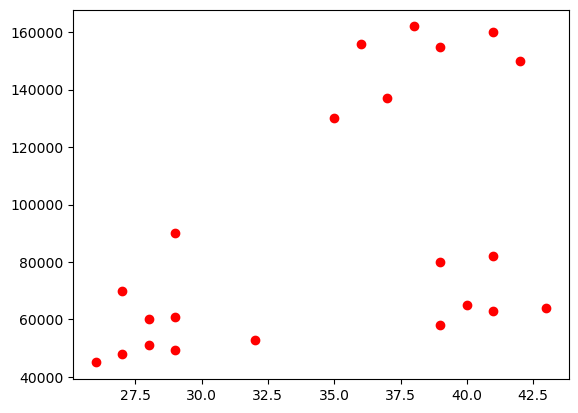

In [14]:
plt.scatter(df['Age'], df['Income($)'], color='red')

In [18]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [20]:
y_predicted = km.fit_predict(df[['Age', 'Income($)']])
y_predicted

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int32)

In [22]:
df['cluter'] = y_predicted
df.head()

,Name,Age,Income($),cluter
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


In [30]:
df1 = df[df.cluter == 0]
df2 = df[df.cluter == 1]
df3 = df[df.cluter == 2]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


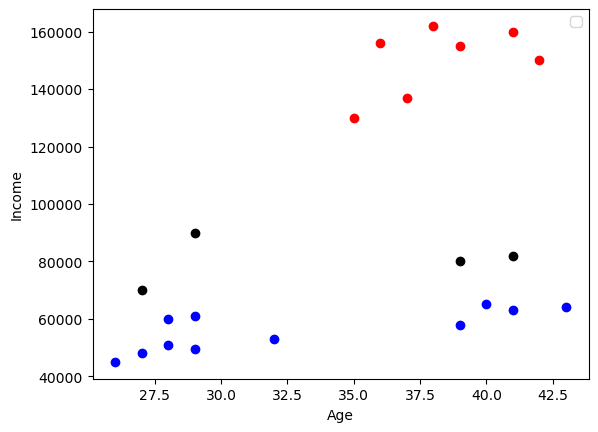

In [34]:
plt.scatter(df1.Age, df1['Income($)'], color='blue')
plt.scatter(df2.Age, df2['Income($)'], color='red')
plt.scatter(df3.Age, df3['Income($)'], color='black')

plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()

In [50]:
scalar = MinMaxScaler()
scalar.fit(df[['Income($)']])
df['Income($)'] = scalar.transform(df[['Income($)']])
scalar.fit(df[['Age']])
df['Age'] = scalar.transform(df[['Age']])
df

,Name,Age,Income($),cluter
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [52]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age', 'Income($)']])

In [54]:
y_predicted

array([0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [56]:
df['cluster'] = y_predicted

In [58]:
df.drop('cluter', axis=1, inplace=True) 

In [60]:
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,2
5,Gautam,0.764706,0.940171,2
6,David,0.882353,0.982906,2
7,Andrea,0.705882,1.000000,2
8,Brad,0.588235,0.948718,2
9,Angelina,0.529412,0.726496,2


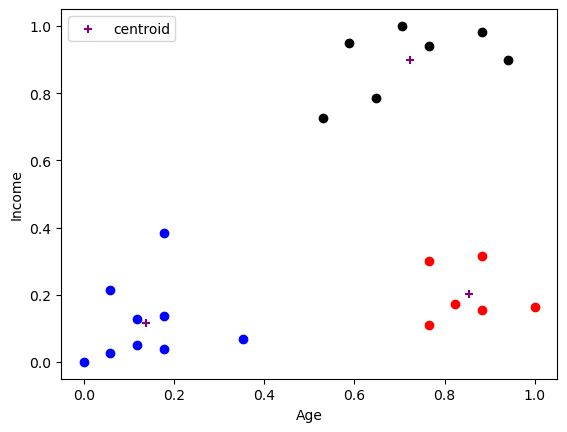

In [70]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]
plt.scatter(df1.Age, df1['Income($)'], color='blue')
plt.scatter(df2.Age, df2['Income($)'], color='red')
plt.scatter(df3.Age, df3['Income($)'], color='black')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='purple', marker='+', label='centroid')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()

In [66]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ],
       [0.72268908, 0.8974359 ]])

Elbow Technique

In [77]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age', 'Income($)']])
    sse.append(km.inertia_)

In [79]:
sse

[5.434011511988177,
 2.3456144914725936,
 0.47507834985530945,
 0.3491047094419564,
 0.2974548101115545,
 0.23472396003560045,
 0.19319174956984386,
 0.14087951725103115,
 0.1321471082406226]

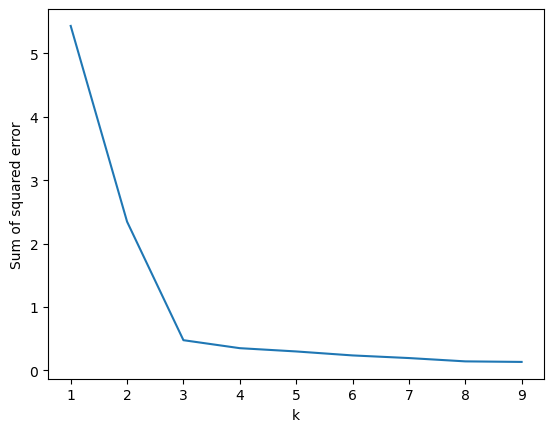

In [81]:
plt.xlabel("k")
plt.ylabel('Sum of squared error')
plt.plot(k_rng, sse)